In [2]:
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch
import numpy as np

In [3]:
### Pandas setup
def pandas_setup():
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.width', 10)
    pd.options.display.float_format = '{:.2f}'.format 
    return

pandas_setup()


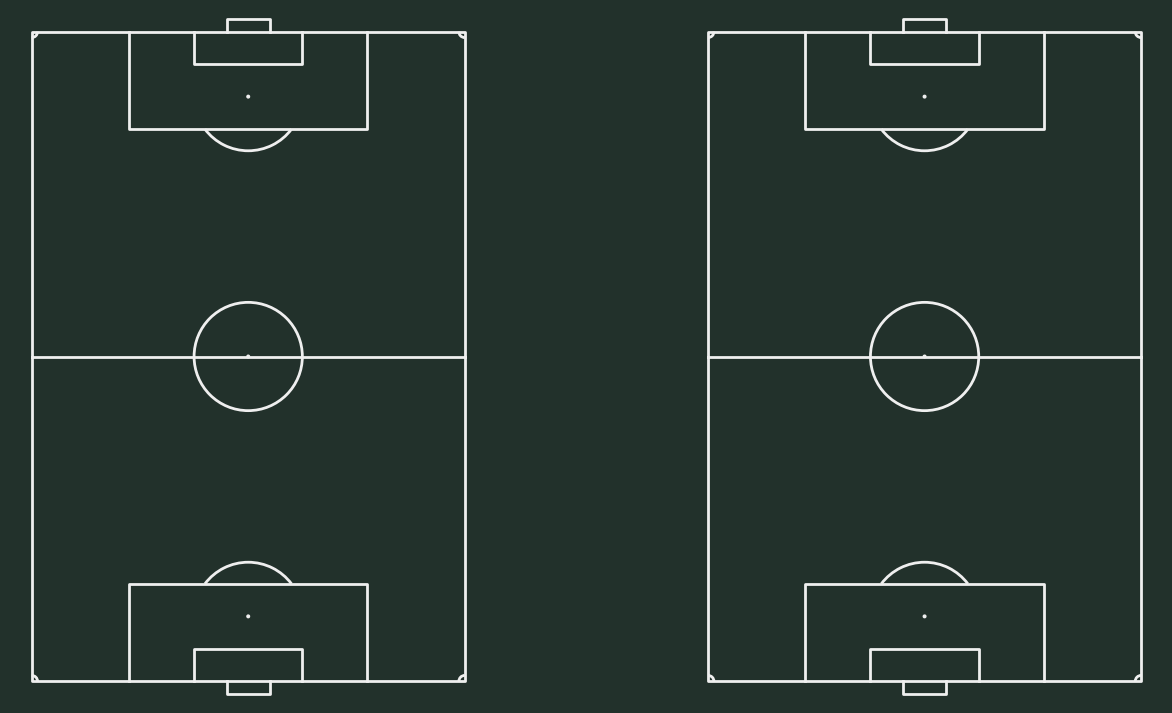

In [4]:
fig, ax = plt.subplots(ncols = 2, figsize=(16,9))
pitch = VerticalPitch(
    pitch_type= 'statsbomb',
    axis = False,
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    # pitch_color= 'grass',
    pitch_color='#22312b', line_color='#efefef',
    # stripe = True, 
    # stripe_color= 'Grey',
    corner_arcs= True
    )
fig.set_facecolor('#22312b')
pitch.draw(ax = ax[0])
pitch.draw(ax = ax[1])


In [5]:
sb.competitions()[sb.competitions().competition_name == 'FIFA World Cup']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
26,43,106,International,FIFA World Cup,male,False,True,2022,2023-11-05T04:23:26.649917,2023-11-21T15:37:11.589616,2023-11-21T15:37:11.589616,2023-11-05T04:23:26.649917
27,43,3,International,FIFA World Cup,male,False,True,2018,2023-07-24T13:09:34.513519,2021-06-13T16:17:31.694,None,2023-07-24T13:09:34.513519
28,43,55,International,FIFA World Cup,male,False,True,1990,2023-06-28T10:58:20.137929,2021-06-12T16:17:31.694,None,2023-06-28T10:58:20.137929
29,43,54,International,FIFA World Cup,male,False,True,1986,2023-06-28T11:20:34.252935,2021-06-13T16:17:31.694,None,2023-06-28T11:20:34.252935
30,43,51,International,FIFA World Cup,male,False,True,1974,2023-07-17T23:19:58.853207,2021-06-13T16:17:31.694,None,2023-07-17T23:19:58.853207
31,43,272,International,FIFA World Cup,male,False,True,1970,2023-07-17T23:24:45.579886,None,None,2023-07-17T23:24:45.579886
32,43,270,International,FIFA World Cup,male,False,True,1962,2023-06-26T10:38:00.323984,None,None,2023-06-26T10:38:00.323984
33,43,269,International,FIFA World Cup,male,False,True,1958,2023-06-26T10:33:08.214831,None,None,2023-06-26T10:33:08.214831


In [6]:
arg_bra = sb.events(match_id=3793185)

In [7]:
tiros = arg_bra[arg_bra['type'] == 'Shot']
tiros.shape

(23, 92)

In [8]:
tiros.shot_outcome.value_counts()

shot_outcome
Off T            10
Saved             5
Blocked           4
Post              1
Saved to Post     1
Wayward           1
Goal              1
Name: count, dtype: int64

### De quién habrá sido ese gol??

In [9]:
arg_bra[arg_bra['shot_outcome'] == 'Goal'].player

2936    Claudio Paul Caniggia
Name: player, dtype: object

### Busco la posición X e Y desde donde se hicieron los tiros

In [10]:
tiros[['x','y']] = tiros.location.apply(pd.Series) 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13804\4071340450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros[['x','y']] = tiros.location.apply(pd.Series)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13804\4071340450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros[['x','y']] = tiros.location.apply(pd.Series)


In [11]:
tiros.shot_outcome.value_counts()

shot_outcome
Off T            10
Saved             5
Blocked           4
Post              1
Saved to Post     1
Wayward           1
Goal              1
Name: count, dtype: int64

In [12]:
No_gol_arg = tiros[(tiros['team'] == 'Argentina')&(tiros['shot_outcome'] != 'Goal')]
no_gol_bra = tiros[(tiros['team'] == 'Brazil')&(tiros['shot_outcome'] != 'Goal')]
gol_arg = tiros[(tiros['team'] == 'Argentina')&(tiros['shot_outcome'] == 'Goal')]
gol_bra = tiros[(tiros['team'] == 'Brazil')&(tiros['shot_outcome'] == 'Goal')] #Lamentablemente, no embocaron

In [45]:
xG_arg = round(No_gol_arg.shot_statsbomb_xg.sum() + gol_arg.shot_statsbomb_xg.sum(), 2)
xG_bra = round(no_gol_bra.shot_statsbomb_xg.sum() + gol_bra.shot_statsbomb_xg.sum(), 2)

In [13]:
No_gol_arg.x.value_counts()

x
104.30    1
109.10    1
91.00     1
89.10     1
95.90     1
Name: count, dtype: int64

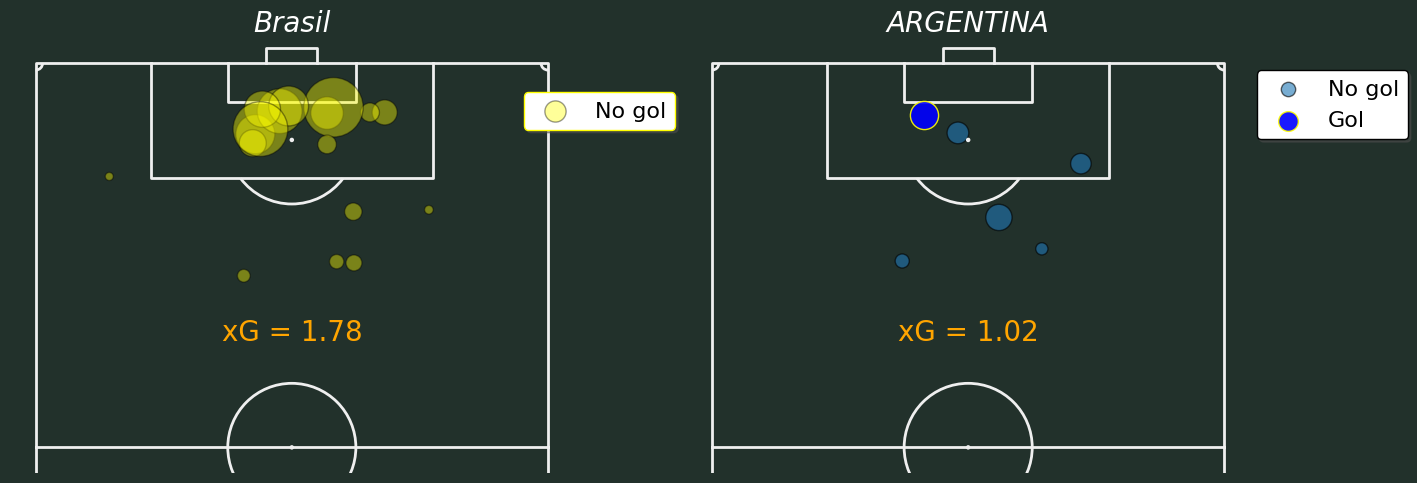

In [54]:
fig, ax = plt.subplots(ncols = 2, figsize=(16,9))
pitch = VerticalPitch(
    pitch_type= 'statsbomb',
    axis = False,
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    half = True,
    # pitch_color= 'grass',
    pitch_color='#22312b', line_color='#efefef',
    # stripe = True, 
    # stripe_color= 'Grey',
    corner_arcs= True
    )
fig.set_facecolor('#22312b')
pitch.draw(ax = ax[0])
pitch.draw(ax = ax[1])

#Ploteo los datos de Brasil
pitch.scatter(x = no_gol_bra.x, y = no_gol_bra.y, ax = ax[0], alpha = 0.4, c = 'yellow', ec = 'Black', s = no_gol_bra.shot_statsbomb_xg * 5000, label = 'No gol', zorder = 99)
pitch.scatter(x = gol_bra.x, y = gol_bra.y, ax = ax[0], alpha = 0.9, c = 'Yellow',ec = 'Yellow', s = gol_bra.shot_statsbomb_xg * 500, zorder = 0)
ax[0].legend(loc="upper right", fontsize = 16,markerscale = 0.5, bbox_to_anchor=(1.2, 0.9), edgecolor = 'Yellow', shadow = True);
ax[0].set_title('Brasil', color='white', va='center', ha='center', fontsize = 20, fontfamily = 'Sans-serif',fontstyle=  'italic');
ax[0].text(40, 78,f'xG = {xG_bra}', c = 'Orange', fontsize = 20, va = 'center', ha = 'center')

#Ploteo los datos de Argentina
pitch.scatter(x = No_gol_arg.x, y = No_gol_arg.y, ax = ax[1], alpha = 0.6, ec = 'Black', s = No_gol_arg.shot_statsbomb_xg * 5000, label = 'No gol', zorder = 0)
pitch.scatter(x = gol_arg.x, y = gol_arg.y, ax = ax[1], alpha = 0.9, c = 'Blue',ec = 'Yellow', s = gol_arg.shot_statsbomb_xg * 500, label = 'Gol', zorder = 99)
ax[1].legend(loc="upper right", fontsize = 16,markerscale = 0.7, bbox_to_anchor=(1.3, 0.95), edgecolor = 'black', shadow = True) ;
ax[1].set_title('ARGENTINA', color='white', va='center', ha='center', fontsize = 20, fontfamily = 'Sans-serif',fontstyle=  'italic');
ax[1].text(40, 78,f'xG = {xG_arg}', c = 'Orange', fontsize = 20, va = 'center', ha = 'center')

plt.savefig("Mapa de tiros Arg-Bra 1990", dpi = 300)